# mount drive

In [1]:
use_colaboratory = True
if use_colaboratory:
    import os
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('/content/drive/MyDrive/kaggle/tabular-playground-series-mar-2022/notebook')

Mounted at /content/drive


In [2]:
# import packages
import datetime
import holidays
import itertools
import math
import pickle

import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

%matplotlib inline

### 014-1
学習データ全体で座標，方角，曜日，時，分ごとの中央値を取って予測値とする

In [ ]:
# load data
train = pd.read_csv("../input/train.csv", index_col="row_id")
test = pd.read_csv("../input/test.csv", index_col="row_id")

In [ ]:
train.time = pd.to_datetime(train.time)
test.time = pd.to_datetime(test.time)

In [ ]:
# trainとtestをまとめる
data = pd.concat([train, test])

# 時系列の特徴量を追加
data["hour"] = data.time.dt.hour
data["minute"] = data.time.dt.minute
data["weekday"] = data.time.dt.weekday
data["isAMrush"] = ((6 <= data.hour) & (data.hour <= 10)).astype("int")
data["isPMrush"] = ((15 <= data.hour) & (data.hour <= 20)).astype("int")
data["isSat"] = (data.weekday == 5).astype("int")
us_holidays = holidays.US()
data["isholiday"] = (data.time.map(lambda x: x in us_holidays)).astype("int")

# trainデータから座標，方角，曜日，時，分ごとの中央値を計算
medians = data.iloc[:len(train)].groupby(["x", "y", "direction", "weekday", "hour", "minute"]).congestion.median()
medians.name = "wd_h_min_median"
# 中央値を特徴量として追加
data = data.merge(medians, how="left", left_on=["x", "y", "direction", "weekday", "hour", "minute"], right_index=True)

In [ ]:
train = data.iloc[:len(train)]
test = data.iloc[len(train):]

In [ ]:
print("=== score ===")
print(mean_absolute_error(train.wd_h_min_median, train.congestion))

=== score ===
5.889287081706103


In [ ]:
y_pred = test.wd_h_min_median.values
with open("../output/y_pred_014-1.pkl", "wb") as f:
    pickle.dump(y_pred, f)

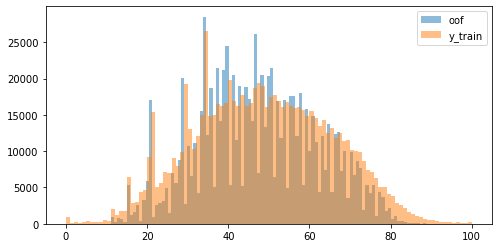

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(train.wd_h_min_median, bins=100, label="median", alpha=0.5)
plt.hist(train.congestion, bins=100, label="y_train", alpha=0.5)
plt.legend()
plt.show()

### 014-2
学習データ全体で座標，方角，曜日，時，分ごとの平均値を取って予測値とする

In [ ]:
# load data
train = pd.read_csv("../input/train.csv", index_col="row_id")
test = pd.read_csv("../input/test.csv", index_col="row_id")

In [ ]:
train.time = pd.to_datetime(train.time)
test.time = pd.to_datetime(test.time)

In [ ]:
# trainとtestをまとめる
data = pd.concat([train, test])

# 時系列の特徴量を追加
data["hour"] = data.time.dt.hour
data["minute"] = data.time.dt.minute
data["weekday"] = data.time.dt.weekday
data["isAMrush"] = ((6 <= data.hour) & (data.hour <= 10)).astype("int")
data["isPMrush"] = ((15 <= data.hour) & (data.hour <= 20)).astype("int")
data["isSat"] = (data.weekday == 5).astype("int")
us_holidays = holidays.US()
data["isholiday"] = (data.time.map(lambda x: x in us_holidays)).astype("int")

# trainデータから座標，方角，曜日，時，分ごとの平均値を計算
means = data.iloc[:len(train)].groupby(["x", "y", "direction", "weekday", "hour", "minute"]).congestion.mean()
means.name = "wd_h_min_mean"
# 平均値を特徴量として追加
data = data.merge(means, how="left", left_on=["x", "y", "direction", "weekday", "hour", "minute"], right_index=True)

In [ ]:
train = data.iloc[:len(train)]
test = data.iloc[len(train):]

In [ ]:
print("=== score ===")
print(mean_absolute_error(train.wd_h_min_mean, train.congestion))

=== score ===
6.076549223508784


In [ ]:
y_pred = test.wd_h_min_mean.values
with open("../output/y_pred_014-2.pkl", "wb") as f:
    pickle.dump(y_pred, f)

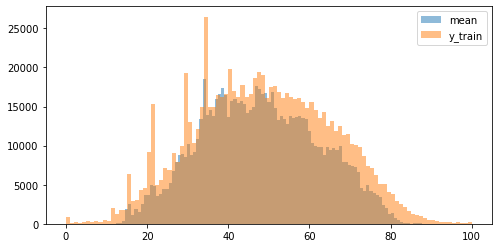

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(train.wd_h_min_mean, bins=100, label="mean", alpha=0.5)
plt.hist(train.congestion, bins=100, label="y_train", alpha=0.5)
plt.legend()
plt.show()

### データ確認
学習データ全体の中央値からの差を見る

In [3]:
# load data
train = pd.read_csv("../input/train.csv", index_col="row_id")
test = pd.read_csv("../input/test.csv", index_col="row_id")

In [4]:
train.time = pd.to_datetime(train.time)
test.time = pd.to_datetime(test.time)

In [5]:
# trainとtestをまとめる
data = pd.concat([train, test])

# 時系列の特徴量を追加
data["hour"] = data.time.dt.hour
data["minute"] = data.time.dt.minute
data["weekday"] = data.time.dt.weekday
data["dayofyear"] = data.time.dt.dayofyear
data["weekofyear"] = data.time.dt.weekofyear
data["isAMrush"] = ((6 <= data.hour) & (data.hour <= 10)).astype("int")
data["isPMrush"] = ((15 <= data.hour) & (data.hour <= 20)).astype("int")
data["isSat"] = (data.weekday == 5).astype("int")
us_holidays = holidays.US()
data["isholiday"] = (data.time.map(lambda x: x in us_holidays)).astype("int")

# trainデータから座標，方角，曜日，時，分ごとの中央値を計算
medians = data.iloc[:len(train)].groupby(["x", "y", "direction", "weekday", "hour", "minute"]).congestion.median()
medians.name = "wd_h_min_median"
# 中央値を特徴量として追加
data = data.merge(medians, how="left", left_on=["x", "y", "direction", "weekday", "hour", "minute"], right_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [6]:
# 中央値からのズレを求める
data["difference"] = data.congestion - data.wd_h_min_median
data["diff_square"] = data.difference**2

In [7]:
train = data.iloc[:len(train)]
test = data.iloc[len(train):]

In [8]:
# 中央値からのズレの大きさ上位5%
df = train.sort_values("diff_square", ascending=False).iloc[:int(len(train)*0.05)]

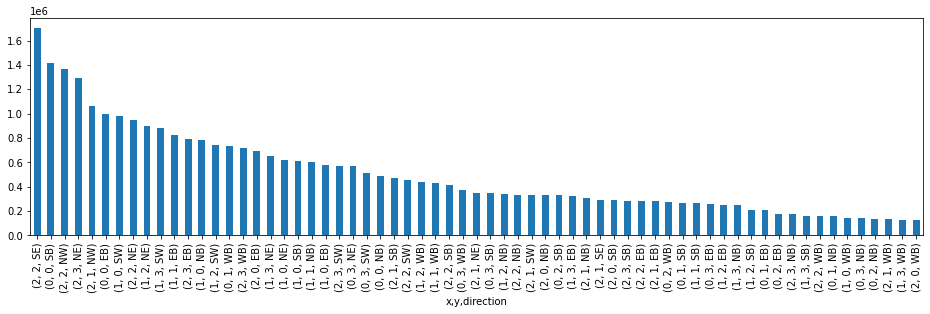

In [9]:
# 座標，方角で集計
plt.figure(figsize=(16, 4))
df.groupby(["x", "y", "direction"]).diff_square.sum().sort_values(ascending=False).plot(kind="bar")

In [16]:
df[(df.x == 2) & (df.y == 2) & (df.direction == "SE")].sort_values("diff_square", ascending=False)

,time,x,y,direction,congestion,hour,minute,weekday,dayofyear,weekofyear,isAMrush,isPMrush,isSat,isholiday,wd_h_min_median,difference,diff_square
row_id,,,,,,,,,,,,,,,,,
253166,1991-05-25 07:00:00,2,2,SE,92.0,7,0,5,145,21,1,0,1,0,20.0,72.0,5184.00
16761,1991-04-04 13:40:00,2,2,SE,92.0,13,40,3,94,14,0,0,0,0,20.0,72.0,5184.00
16956,1991-04-04 14:40:00,2,2,SE,92.0,14,40,3,94,14,0,0,0,0,30.0,62.0,3844.00
16826,1991-04-04 14:00:00,2,2,SE,100.0,14,0,3,94,14,0,0,0,0,40.0,60.0,3600.00
762181,1991-09-11 11:20:00,2,2,SE,76.0,11,20,2,254,37,0,0,0,0,20.0,56.0,3136.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779796,1991-09-15 09:40:00,2,2,SE,40.0,9,40,6,258,37,1,0,0,0,21.5,18.5,342.25
839596,1991-09-28 12:20:00,2,2,SE,20.0,12,20,5,271,39,0,0,1,0,38.5,-18.5,342.25
127781,1991-04-28 09:40:00,2,2,SE,40.0,9,40,6,118,17,1,0,0,0,21.5,18.5,342.25


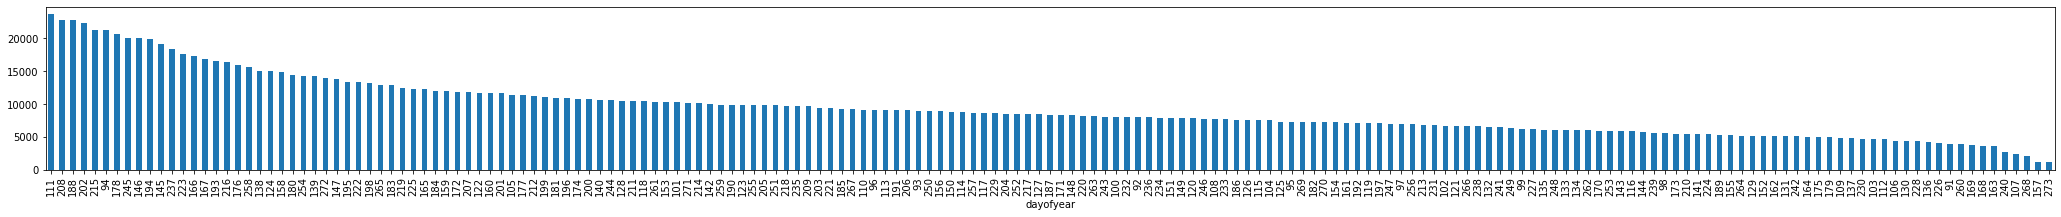

In [14]:
plt.figure(figsize=(36, 4))
df[(df.x == 2) & (df.y == 2) & (df.direction == "SE")].groupby("dayofyear").diff_square.sum().sort_values(ascending=False).plot(kind="bar")

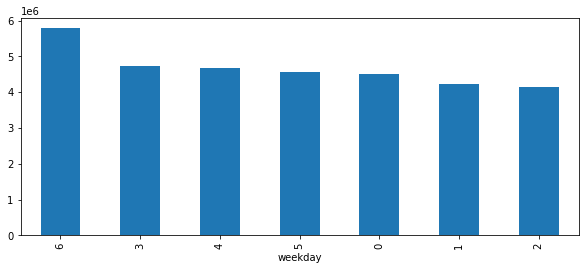

In [ ]:
# 曜日で集計
plt.figure(figsize=(10, 4))
df.groupby(["weekday"]).diff_square.sum().sort_values(ascending=False).plot(kind="bar")

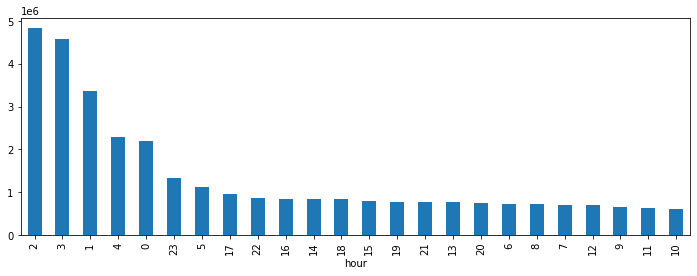

In [ ]:
# 時間で集計
plt.figure(figsize=(12, 4))
df.groupby(["hour"]).diff_square.sum().sort_values(ascending=False).plot(kind="bar")

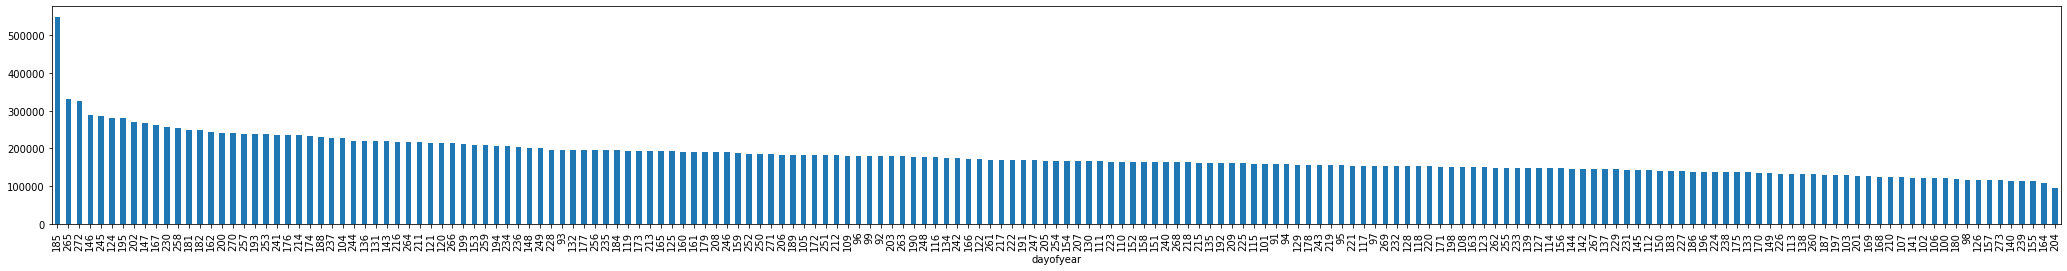

In [ ]:
# 日にちで集計
plt.figure(figsize=(36, 4))
df.groupby(["dayofyear"]).diff_square.sum().sort_values(ascending=False).plot(kind="bar")

### 014-3
学習データ全体から求めた中央値を特徴量に追加

In [ ]:
# load data
train = pd.read_csv("../input/train.csv", index_col="row_id")
test = pd.read_csv("../input/test.csv", index_col="row_id")
train.time = pd.to_datetime(train.time)
test.time = pd.to_datetime(test.time)

In [ ]:
# trainとtestをまとめる
data = pd.concat([train, test])

# 時系列の特徴量を追加
data["hour"] = data.time.dt.hour
data["minute"] = data.time.dt.minute
data["weekday"] = data.time.dt.weekday
# data["dayofyear"] = data.time.dt.dayofyear
# data["weekofyear"] = data.time.dt.weekofyear
data["isAMrush"] = ((6 <= data.hour) & (data.hour <= 10)).astype("int")
data["isPMrush"] = ((15 <= data.hour) & (data.hour <= 20)).astype("int")
data["isSat"] = (data.weekday == 5).astype("int")
us_holidays = holidays.US()
data["isholiday"] = (data.time.map(lambda x: x in us_holidays)).astype("int")

# trainデータから座標，方角，曜日，時，分ごとの中央値を計算
medians = data.iloc[:len(train)].groupby(["x", "y", "direction", "weekday", "hour", "minute"]).congestion.median()
medians.name = "wd_h_min_median"
# 中央値を特徴量として追加
data = data.merge(medians, how="left", left_on=["x", "y", "direction", "weekday", "hour", "minute"], right_index=True)

# 座標と方角はone-hot-encoding
data = pd.get_dummies(data, columns=["x", "y", "direction"])

In [ ]:
# train setとtest setに戻す
train = data.iloc[:len(train)]
test = data.iloc[len(train):]

In [ ]:
# 特徴量，目的変数を作る
X_train = train.drop(["time", "congestion"], axis=1)
y_train = train.congestion
X_test = test.drop(["time", "congestion"], axis=1)

In [ ]:
# 保存用の配列
y_preds = []
models = []
oof_train = np.zeros((len(X_train),))
cv_idx = []


params = {
    "objective": "regression",
    "metric": "mae",
    "learning_rate": 0.05,
}

# 時系列で交差検証
cv = TimeSeriesSplit(n_splits=5)

for fold_idx, (tr_idx, val_idx) in enumerate(cv.split(X_train)):
    cv_idx.append({"train": tr_idx, "valid": val_idx})
    print(f"======== fold: {fold_idx} ========")

    # 学習用，バリデーション用に分割
    X_tr, X_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]
    
    lgb_train = lgb.Dataset(X_tr, y_tr)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    
    model = lgb.train(params, lgb_train,
                      valid_sets=[lgb_train, lgb_eval],
                      verbose_eval=10,
                      num_boost_round=3000,
                      early_stopping_rounds=10)
    
    oof_train[val_idx] = \
        model.predict(X_val, num_iteration=model.best_iteration)

    y_pred = model.predict(X_test, num_iteration=model.best_iteration)

    y_preds.append(y_pred)
    models.append(model)

======== fold: 0 ========
Training until validation scores don't improve for 10 rounds.
[10]	training's l1: 9.76231	valid_1's l1: 9.85095
[20]	training's l1: 7.66873	valid_1's l1: 7.76318
[30]	training's l1: 6.64153	valid_1's l1: 6.73971
[40]	training's l1: 6.15899	valid_1's l1: 6.26394
[50]	training's l1: 5.92946	valid_1's l1: 6.0438
[60]	training's l1: 5.81877	valid_1's l1: 5.9428
[70]	training's l1: 5.76637	valid_1's l1: 5.90068
[80]	training's l1: 5.73757	valid_1's l1: 5.8831
[90]	training's l1: 5.72094	valid_1's l1: 5.87669
[100]	training's l1: 5.70839	valid_1's l1: 5.87685
Early stopping, best iteration is:
[92]	training's l1: 5.71822	valid_1's l1: 5.87627
======== fold: 1 ========
Training until validation scores don't improve for 10 rounds.
[10]	training's l1: 9.80201	valid_1's l1: 9.89869
[20]	training's l1: 7.70595	valid_1's l1: 7.82719
[30]	training's l1: 6.6763	valid_1's l1: 6.81036
[40]	training's l1: 6.19218	valid_1's l1: 6.3317
[50]	training's l1: 5.96743	valid_1's l1: 6

In [ ]:
with open("../output/y_preds_014-3.pkl", "wb") as f:
    pickle.dump(y_preds, f)

with open("../output/models_014-3.pkl", "wb") as f:
    pickle.dump(models, f)

with open("../output/oof_train_014-3.pkl", "wb") as f:
    pickle.dump(oof_train, f)

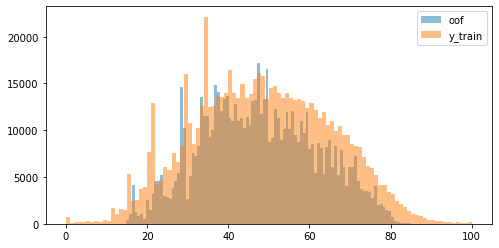

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(oof_train[len(cv_idx[0]["train"]):], bins=100, label="oof", alpha=0.5)
plt.hist(train.iloc[len(cv_idx[0]["train"]):].congestion, bins=100, label="y_train", alpha=0.5)
plt.legend()
plt.show()

In [ ]:
scores = [
    m.best_score["valid_1"]["l1"] for m in models
]
score = sum(scores) / len(scores)
print("=== CV scores ===")
print(scores)
print(score)

=== CV scores ===
[5.876272581939231, 5.93701279305453, 6.153320811252173, 5.956001569527898, 6.321584849052939]
6.048838520965354


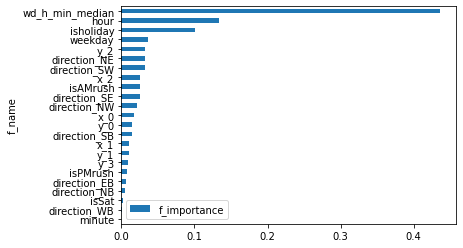

In [ ]:
f_importance = models[-1].feature_importance()
f_importance = f_importance / np.sum(f_importance)
f_name = models[-1].feature_name()

df_importance = pd.DataFrame({"f_name": f_name, "f_importance": f_importance})
df_importance = df_importance.sort_values("f_importance", ascending=True)
df_importance.plot.barh(x="f_name")

In [ ]:
with open("../output/models_014-3.pkl", "rb") as f:
    models = pickle.load(f)

In [ ]:
lgb_train = lgb.Dataset(X_train, y_train)

model = lgb.train(params, lgb_train, num_boost_round=models[-1].best_iteration)

In [ ]:
y_pred_sub = model.predict(X_test, num_iteration=models[-1].best_iteration)

In [ ]:
with open("../output/y_preds_014-3-sub.pkl", "wb") as f:
    pickle.dump(y_pred_sub, f)

### submit

In [ ]:
with open("../output/y_pred_014-1.pkl", "rb") as f:
    y_pred = pickle.load(f)

submission = pd.read_csv("../input/sample_submission.csv")
submission.congestion = y_pred

submission.to_csv("../submit/submission_014-1.csv", index=False)

In [ ]:
with open("../output/y_preds_014-3.pkl", "rb") as f:
    y_preds = pickle.load(f)

submission = pd.read_csv("../input/sample_submission.csv")
submission.congestion = y_preds[-1]

submission.to_csv("../submit/submission_014-3.csv", index=False)

In [ ]:
with open("../output/y_preds_014-3-sub.pkl", "rb") as f:
    y_preds = pickle.load(f)

submission = pd.read_csv("../input/sample_submission.csv")
submission.congestion = y_preds[-1]

submission.to_csv("../submit/submission_014-3-sub.csv", index=False)

In [ ]:
import json
with open('../../kaggle.json') as f:
    json_data = json.load(f)
    os.environ["KAGGLE_USERNAME"] = json_data["username"]
    os.environ["KAGGLE_KEY"] = json_data["key"]

!pip install kaggle --upgrade
!kaggle -v

Kaggle API 1.5.12


In [ ]:
# submission
!kaggle competitions submit tabular-playground-series-mar-2022 -f ../submit/submission_014-1.csv -m "014-1"

100% 27.4k/27.4k [00:06<00:00, 4.59kB/s]
Successfully submitted to Tabular Playground Series - Mar 2022

In [ ]:
# submission
!kaggle competitions submit tabular-playground-series-mar-2022 -f ../submit/submission_014-3.csv -m "014-3"

100% 57.6k/57.6k [00:05<00:00, 10.3kB/s]
Successfully submitted to Tabular Playground Series - Mar 2022

In [ ]:
# submission
!kaggle competitions submit tabular-playground-series-mar-2022 -f ../submit/submission_014-3-sub.csv -m "014-3-sub"

100% 57.1k/57.1k [00:05<00:00, 10.2kB/s]
Successfully submitted to Tabular Playground Series - Mar 2022